Each row in the csv file represents the information from a housing block. 
Columns represent (in order): 
1) Median age of the houses in the block (in years) 
2) Total number of rooms in a given block 
3) Number of bedrooms in a given block 
4) Population in the block 
5) Number of households in the block 
6) Median household income in the block (in thousands of dollars) 
7) Proximity to the ocean (rated on a scale from 0 = closest to 4 = farthest) 
8) Median house value in the block (in dollars)

In [1]:
# Numerical/scientific computing packages.
import numpy as np
import scipy

# Machine learning package.
import sklearn

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

# Sets the matplotlib backend for the notebook.
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is 
# displayed inline within the Jupyter notebook, 
# directly below the code cell that produced it
%matplotlib inline 

print('Finished successfully loading packages')


Finished successfully loading packages


## Question 1

Why  is  it  a  good  idea  to  standardize/normalize  the  predictor  variables  2  and  3  and 
why are predictor variables 4 and 5 probably not very useful by themselves to predict 
median house values in a block?

## Answer 1

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges. In our case, let us test how predictors 2 and 3 are different from each other

In [2]:
file_path = 'housingUnits.csv'

df = pd.read_csv(file_path)
df.columns.values.tolist()

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

Mean of 'total_rooms': 2635.7630813953488
Standard deviation of 'total_rooms': 2181.615251582795

Mean of normalized 'total_rooms': 2.444211930182515e-17
Standard deviation of 'total_rooms': 1.0



{'whiskers': [<matplotlib.lines.Line2D at 0x28406f750>,
 'caps': [<matplotlib.lines.Line2D at 0x284080bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28406ecd0>],
 'medians': [<matplotlib.lines.Line2D at 0x284081fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x284082910>],
 'means': []}

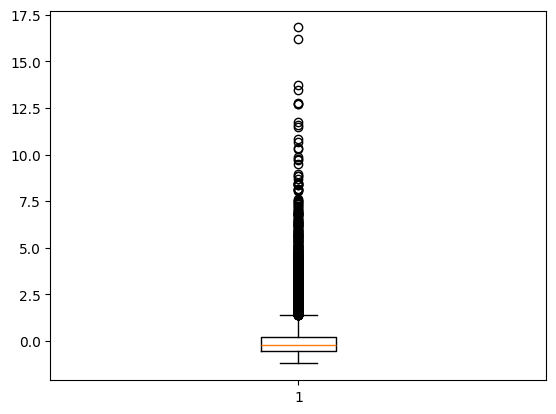

In [3]:
total_rooms = "total_rooms"
total_rooms_mean = df[total_rooms].mean()
total_rooms_std = df[total_rooms].std()
print(f"Mean of '{total_rooms}': {total_rooms_mean}")
print(f"Standard deviation of '{total_rooms}': {total_rooms_std}")
print()

# let's mormalize the set of total rooms
normalized_total_rooms_arr = (df[total_rooms] - df[total_rooms].mean()) / df[total_rooms].std()
print(f"Mean of normalized '{total_rooms}': {normalized_total_rooms_arr.mean()}")
print(f"Standard deviation of '{total_rooms}': {normalized_total_rooms_arr.std()}")
print()

plt.boxplot(normalized_total_rooms_arr)

Mean of 'total_bedrooms': 537.7352713178294
Standard deviation of 'total_bedrooms': 391.3929133157033
Mean of normalized 'total_bedrooms': 9.535869079726151e-17
Standard deviation of 'total_bedrooms': 0.9999999999999998


{'whiskers': [<matplotlib.lines.Line2D at 0x286f06390>,
 'caps': [<matplotlib.lines.Line2D at 0x286f07890>,
 'boxes': [<matplotlib.lines.Line2D at 0x286f05ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x286f10b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x286f11390>],
 'means': []}

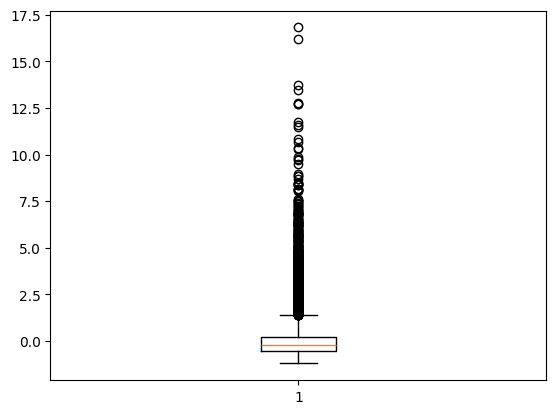

In [4]:
total_bedrooms = "total_bedrooms"
total_bedrooms_mean = df[total_bedrooms].mean()
total_bedrooms_std = df[total_bedrooms].std()
print(f"Mean of '{total_bedrooms}': {total_bedrooms_mean}")
print(f"Standard deviation of '{total_bedrooms}': {total_bedrooms_std}")

# let's normalize the set
normalized_total_bedrooms_arr = (df[total_bedrooms] - df[total_bedrooms].mean()) / df[total_bedrooms].std()
print(f"Mean of normalized '{total_bedrooms}': {normalized_total_bedrooms_arr.mean()}")
print(f"Standard deviation of '{total_bedrooms}': {normalized_total_bedrooms_arr.std()}")

plt.boxplot(normalized_total_bedrooms_arr)

In [5]:
# ROOMS

# let's take the set of (total_rooms / population)
population = "population"
by_population = (df[total_rooms] / df[population])
rooms_normalized_by_population = (by_population - by_population.mean()) / by_population.std()
print(f"Mean of normalized distribution by '{population}': {rooms_normalized_by_population.mean()}")
print(f"Standard deviation of '{population}': {rooms_normalized_by_population.std()}")
print()

# let's take the set of (total_rooms / number_of_households)
households = "households"
by_households = (df[total_rooms] / df[households])
rooms_normalized_by_households = (by_households - by_households.mean()) / by_households.std()
print(f"Mean of normalized distribution by '{households}' for TOTAL ROOMS: {rooms_normalized_by_households.mean()}")
print(f"Standard deviation of '{households}' for TOTAL ROOMS: {rooms_normalized_by_households.std()}")
print()

Mean of normalized distribution by 'population': -7.022806109256804e-17
Standard deviation of 'population': 1.0

Mean of normalized distribution by 'households' for TOTAL ROOMS: 7.711316512125118e-17
Standard deviation of 'households' for TOTAL ROOMS: 1.0



In [6]:
# BEDROOMS

# let's take the set of (total_rooms / population)
population = "population"
by_population = (df[total_bedrooms] / df[population])
bedrooms_normalized_by_population = (by_population - by_population.mean()) / by_population.std()
print(f"Mean of normalized distribution by '{population}': {bedrooms_normalized_by_population.mean()}")
print(f"Standard deviation of '{population}': {bedrooms_normalized_by_population.std()}")
print()

# let's take the set of (total_rooms / number_of_households)
# HOUSEHOLDS MAKE MORE SENSE
households = "households"
by_households = (df[total_bedrooms] / df[households])
bedrooms_normalized_by_households = (by_households - by_households.mean()) / by_households.std()
print(f"Mean of normalized distribution by '{households}': {bedrooms_normalized_by_households.mean()}")
print(f"Standard deviation of '{households}': {bedrooms_normalized_by_households.std()}")
print()

Mean of normalized distribution by 'population': -1.115386852646669e-16
Standard deviation of 'population': 1.0

Mean of normalized distribution by 'households': -1.1016166445893026e-17
Standard deviation of 'households': 1.0000000000000002



In [7]:
data_size = df.shape[0]
data_size

20640

In [8]:
def plot_freq_dist(data, color: str = "red", name_of_room_type: str = "N/A"):
    """
    data: 1d dataframe to plot on the graph
    """
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # define number of bins with accordance to the appropriate size 
    bins = np.arange(data.min().item(), data.max().item() + w, w, dtype=float)
    
    plt.hist(data, edgecolor=color, bins=bins) 
    plt.xlabel("Number of {} in a block".format(name_of_room_type))  # Set x-axis label
    plt.ylabel("frequency")     # Set y-axis label
    plt.show()  # Show the plot

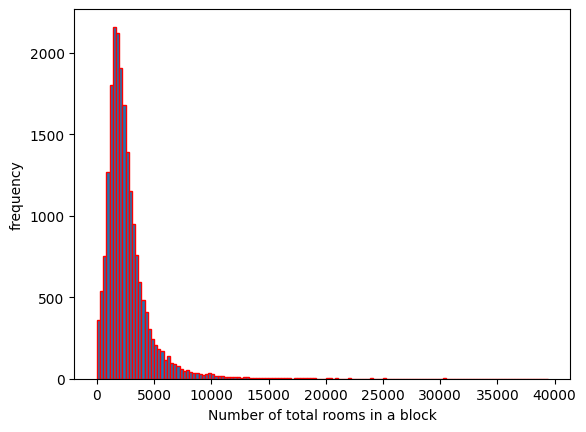

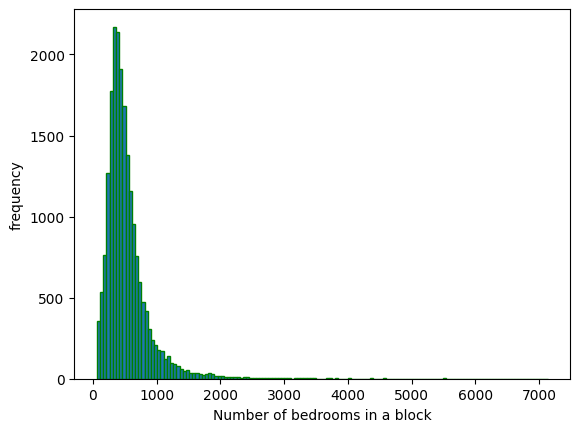

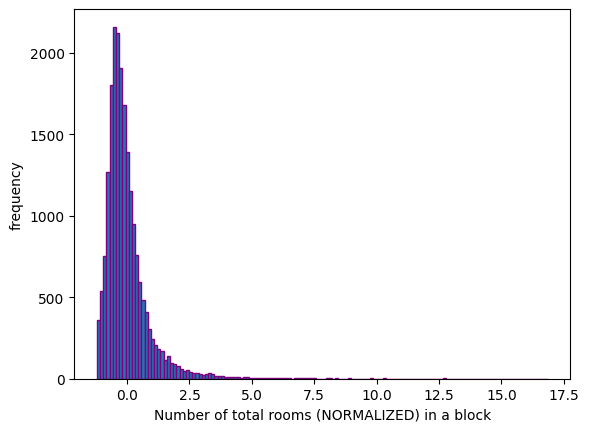

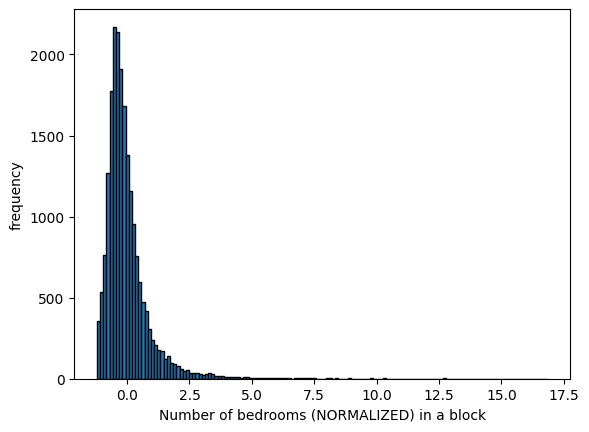

In [21]:
total_rooms_plot = plot_freq_dist(df[total_rooms], color = "red", name_of_room_type="total rooms")
total_bedrooms_plot = plot_freq_dist(df[total_bedrooms], color = "green", name_of_room_type = "bedrooms")

total_normalized_rooms_plot = plot_freq_dist(normalized_total_rooms_arr, color = "purple", name_of_room_type="total rooms (NORMALIZED)")
total_normalized_bedrooms_plot = plot_freq_dist(normalized_total_bedrooms_arr, color = "black", name_of_room_type = "bedrooms (NORMALIZED)")

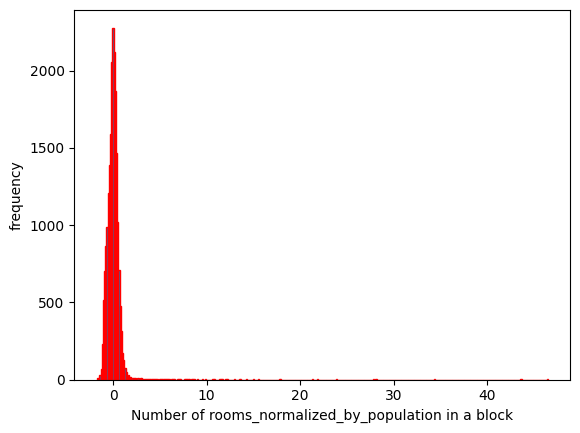

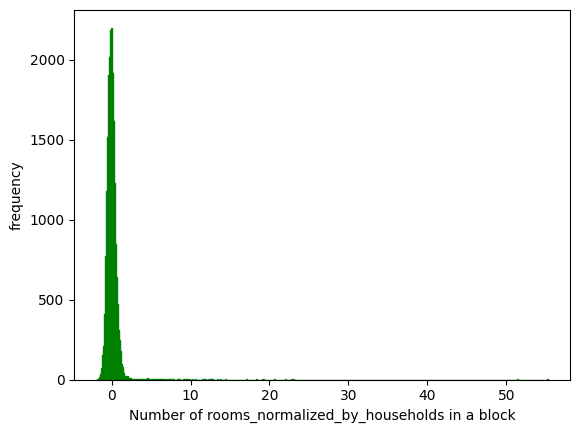

In [10]:
total_rooms_plot_population = plot_freq_dist(rooms_normalized_by_population, color = "red", name_of_room_type="rooms_normalized_by_population")
total_rooms_plot_households = plot_freq_dist(rooms_normalized_by_households, color = "green", name_of_room_type = "rooms_normalized_by_households")

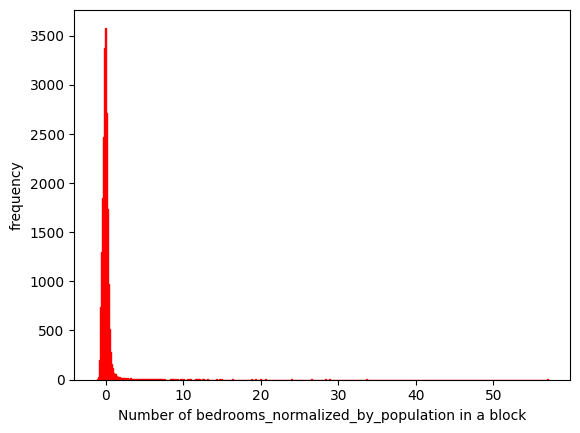

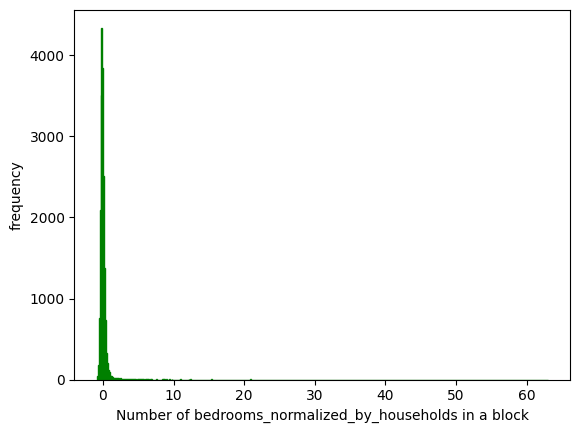

In [11]:
total_bedrooms_plot_population = plot_freq_dist(bedrooms_normalized_by_population, color = "red", name_of_room_type="bedrooms_normalized_by_population")
total_bedrooms_plot_households = plot_freq_dist(bedrooms_normalized_by_households, color = "green", name_of_room_type = "bedrooms_normalized_by_households")

# Figure out whether this one is relevant or not?

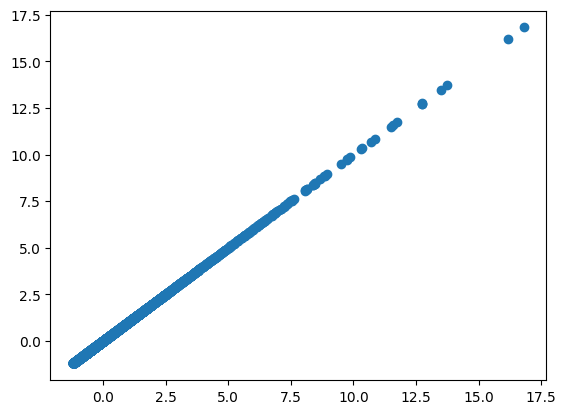

In [18]:
# is this even relevant?
x = normalized_total_rooms_arr
y = normalized_total_bedrooms_arr
plt.scatter(x, y, label = 'Rooms to bedrooms')
plt.show()